<a href="https://colab.research.google.com/github/dardan-gashi01/IN3060-CW/blob/main/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import cv2


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'FER/images/' 
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['.DS_Store', 'validation', 'train']


In [6]:
train_data_path = os.path.join(GOOGLE_DRIVE_PATH, 'train/')
val_data_path = os.path.join(GOOGLE_DRIVE_PATH, 'validation/')
print(os.listdir(train_data_path))
print(os.listdir(val_data_path))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
['angry', 'disgust', 'fear', 'neutral', 'happy', 'sad', 'surprise']


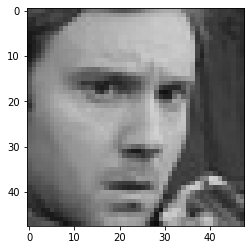

In [7]:
img_array = cv2.imread(os.path.join(train_data_path, 'angry/0.jpg'))
plt.imshow(img_array)

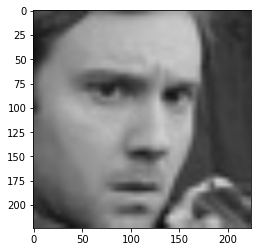

In [8]:
img_size = 224
new_array = cv2.resize(img_array,(img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    val_data_path,
    color_mode='grayscale',
    target_size=(48,48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

Found 7694 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [11]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

img, label = train_generator.__next__()

Creating the ML model 

In [12]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

#7 classees and using softmax over sigmoid because sigmoid is for classification of 2 ouputs 
model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [13]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_data_path):
  num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(val_data_path):
  num_test_imgs+=len(files)



In [14]:
print(num_train_imgs)
print(num_test_imgs)

7694
7066


In [ ]:
epochs = 30

history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs//32,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = num_test_imgs//32)

model.save('/content/drive/MyDrive/FER/model_file.h5')